# Pandas Basics <hr style ="border:2.5px solid #964B00 "></hr>

Data Analyst: Sheny Uriza Mae C. Nardo <br>
Department: Electrical Engineering

In [52]:
#%pip install pandas --upgrade

In [53]:
#%pip install matplotlib --upgrade

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# DataFrame

In [55]:
data = {
    "name":['Rwyne', 'Karis', 'Chris'],
    "age":[9, 24, 15],
    "sex":['M', 'M','M']

}
data

{'name': ['Rwyne', 'Karis', 'Chris'],
 'age': [9, 24, 15],
 'sex': ['M', 'M', 'M']}

In [56]:
df = pd.DataFrame(data)
df

,name,age,sex
0,Rwyne,9,M
1,Karis,24,M
2,Chris,15,M


In [57]:
df['age']

0     9
1    24
2    15
Name: age, dtype: int64

In [58]:
df['age'].sum()

np.int64(48)

In [59]:
df['age'].mean()

np.float64(16.0)

In [60]:
df['age'].median()

np.float64(15.0)

In [61]:
df['name']

0    Rwyne
1    Karis
2    Chris
Name: name, dtype: object

In [62]:
df['sex']

0    M
1    M
2    M
Name: sex, dtype: object

# Correlation

In [81]:
measurements = {
    "Current":[2,3.5,1.8,4.2,2.7],
    "Power":[100,200,90,210,110]

}
measurements

{'Current': [2, 3.5, 1.8, 4.2, 2.7], 'Power': [100, 200, 90, 210, 110]}

In [82]:
df = pd.DataFrame(measurements)
df

,Current,Power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [83]:
df.cov()

,Current,Power
Current,1.023,56.15
Power,56.150,3370.00


In [84]:
df.corr()

,Current,Power
Current,1.000000,0.956306
Power,0.956306,1.000000


In [85]:
df.describe()

,Current,Power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


In [68]:
machines = {
     "Jaguar":[10.6,9.1,9.3,9.8,10.5,10.4,9.5,11,10.4,3,9.8],
     "Panther":[10.1,11,9.1,20,9.2,10.8,9.9,9.2,9.1,9.1,np.nan]

}
machines

{'Jaguar': [10.6, 9.1, 9.3, 9.8, 10.5, 10.4, 9.5, 11, 10.4, 3, 9.8],
 'Panther': [10.1, 11, 9.1, 20, 9.2, 10.8, 9.9, 9.2, 9.1, 9.1, nan]}

In [69]:
df = pd.DataFrame(machines)
df

,Jaguar,Panther
0,10.6,10.1
1,9.1,11.0
2,9.3,9.1
3,9.8,20.0
4,10.5,9.2
5,10.4,10.8
6,9.5,9.9
7,11.0,9.2
8,10.4,9.1
9,3.0,9.1


In [70]:
df.describe()

,Jaguar,Panther
count,11.000000,10.000000
mean,9.400000,10.750000
std,2.204541,3.329081
min,3.000000,9.100000
25%,9.400000,9.125000
50%,9.800000,9.550000
75%,10.450000,10.625000
max,11.000000,20.000000


In [71]:
df.cov()

,Jaguar,Panther
Jaguar,4.860000,0.855556
Panther,0.855556,11.082778


In [72]:
df.corr()

,Jaguar,Panther
Jaguar,1.000000,0.110794
Panther,0.110794,1.000000


# Scatter Plot

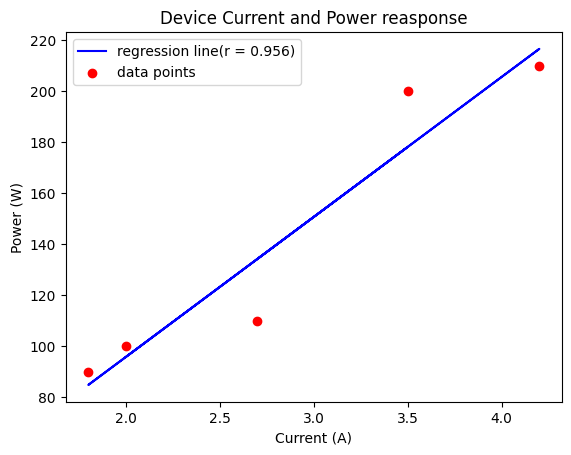

In [132]:
x = df['Current']
y = df['Power']

# regression line
slope, intercept, r, p_value, std_err = stats.linregress(x,y)
line = slope*x + intercept

plt.plot(x,line,
         color='blue',
         label = f'regression line(r = {r:.3f})')
# scatter
plt.scatter(x,y,
            color = 'red',
            label = 'data points')
plt.title('Device Current and Power reasponse')
plt.ylabel('Power (W)')
plt.xlabel('Current (A)')
plt.legend()
plt.show()


# Resistance Test

In [134]:
resistance = pd.read_csv("resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [135]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [146]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [140]:
pan_mean = resistance['Panther'].mean()
pan_mean

np.float64(10.75)

In [142]:
resistance['Panther'].fillna(pan_mean)

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [144]:
resistance['Panther'].fillna(pan_mean)

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [145]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


# Bar Graph

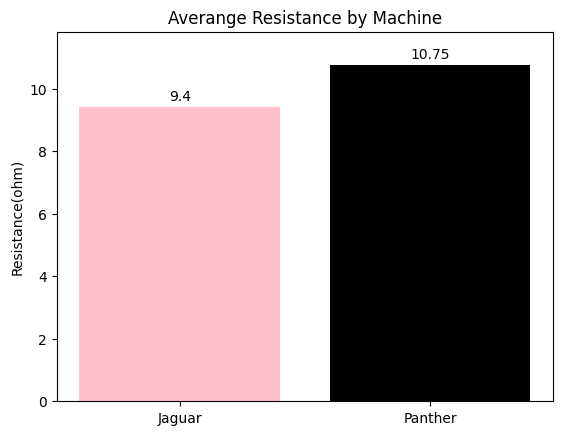

In [157]:
bars =plt.bar(['Jaguar', 'Panther'],[jag_mean,pan_mean],
              color=['pink','black'])
plt.title('Averange Resistance by Machine')
plt.ylabel('Resistance(ohm)')

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1)
plt.show()